In [3]:
#
# # 빅데이터 분석기사: 군집화(Clustering) 실습 데이터셋 컬럼 설명
#
# # ---
# # 데이터셋은 주로 신용카드 이용 패턴 및 고객의 금융 행동을 나타내는 변수들로 구성되어 있으며,
# # 이를 바탕으로 고객을 세분화(Segmentation)하는 군집 분석에 활용될 수 있다.
# # ---
#
# # | 컬럼명                      | 데이터 타입 | 설명                  | 주요 분석 포인트                                |
# # | -------------------------- | ----------- | -------------------- | -------------------------------------------- |
#
# # 1. **CUST_ID** (문자열)
# # - 설명: 고객 고유 식별자
# # - 분석 포인트: 클러스터링 시 제외 (ID 컬럼).
#
# # 2. **BALANCE** (float)
# # - 설명: 고객의 평균 월별 잔액
# # - 분석 포인트: 소비 후 남는 평균 금액 (낮을수록 소비 많음, 재정적 여유 지표).
#
# # 3. **BALANCE_FREQUENCY** (float, 0~1)
# # - 설명: 잔액 갱신 빈도 (1에 가까울수록 잦음)
# # - 분석 포인트: 잔액 변동성, 활발한 금융 활동 정도.
#
# # 4. **PURCHASES** (float)
# # - 설명: 월평균 구매 금액
# # - 분석 포인트: 고객의 전체적인 평균 소비 수준.
#
# # 5. **ONEOFF_PURCHASES** (float)
# # - 설명: 일시불 결제 금액 합계
# # - 분석 포인트: 충동적/고액 구매 성향, 일회성 지출 성향.
#
# # 6. **INSTALLMENTS_PURCHASES** (float)
# # - 설명: 할부 결제 금액 합계
# # - 분석 포인트: 장기 지출 성향, 계획적/분할 결제 선호도.
#
# # 7. **CASH_ADVANCE** (float)
# # - 설명: 현금서비스 사용 금액
# # - 분석 포인트: 현금 유동성 부족 여부, 긴급 자금 필요 정도.
#
# # 8. **PURCHASES_FREQUENCY** (float, 0~1)
# # - 설명: 구매 발생 비율 (1에 가까울수록 빈도가 높음)
# # - 분석 포인트: 소비 활동의 전체 빈도.
#
# # 9. **ONEOFF_PURCHASES_FREQUENCY** (float)
# # - 설명: 일시불 구매 비율
# # - 분석 포인트: 단기적 소비/고액 구매 성향 빈도.
#
# # 10. **PURCHASES_INSTALLMENTS_FREQUENCY** (float)
# # - 설명: 할부 구매 비율
# # - 분석 포인트: 할부 이용 빈도, 금융 상품 활용 성향.
#
# # 11. **CASH_ADVANCE_FREQUENCY** (float)
# # - 설명: 현금서비스 사용 빈도
# # - 분석 포인트: 현금 유동성 위험도, 신용 리스크 지표.
#
# # 12. **CASH_ADVANCE_TRX** (int)
# # - 설명: 현금서비스 거래 횟수
# # - 분석 포인트: 현금서비스 사용 패턴의 횟수 지표.
#
# # 13. **PURCHASES_TRX** (int)
# # - 설명: 구매 거래 횟수
# # - 분석 포인트: 전체적인 소비 활동의 빈도수.
#
# # 14. **CREDIT_LIMIT** (float)
# # - 설명: 신용 한도
# # - 분석 포인트: 소득 수준 또는 신용도/리스크 등급 지표.
#
# # 15. **PAYMENTS** (float)
# # - 설명: 월별 평균 결제 금액
# # - 분석 포인트: 지불 능력 및 상환 규모.
#
# # 16. **MINIMUM_PAYMENTS** (float)
# # - 설명: 최소 납부 금액
# # - 분석 포인트: 미납 위험성, 신용 관리 성향 (최소 금액만 납부하는 성향 파악).
#
# # 17. **PRC_FULL_PAYMENT** (float, 0~1)
# # - 설명: 전체 결제 비율 (1이면 매번 완납하는 고객)
# # - 분석 포인트: 신용카드 사용 건전성, 이자 회피 성향.
#
# # 18. **TENURE** (int)
# # - 설명: 고객 유지 개월 수
# # - 분석 포인트: 거래 기간, 고객 충성도/장기 고객 여부 판단.
#

In [4]:
# 1. 문제 정의 (Problem Definition)
#  
# 목표: 신용카드 사용자의 소비 패턴을 분석하여 유사한 그룹으로 군집화한다.

# 활용:
# 고객 세그먼테이션(Customer Segmentation)
# 마케팅 전략 수립 (고소득/고소비/저소비 그룹별 맞춤형 서비스 제공)
# 데이터 기반 의사결정:
# 각 클러스터별 평균 소비 금액, 결제 성향 등을 분석해 마케팅 타겟팅 개선

In [5]:
#---------------------------------------------------------------------------
# 불러오기
#---------------------------------------------------------------------------

In [6]:
import pandas as pd

# 데이터셋 불러오기 (Kaggle 데이터셋)
df = pd.read_csv("CC GENERAL.csv")

# 상위 5개 행 확인
df.head()

,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,C10001,40.900749,0.818182,95.40,0.00,95.4,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12
1,C10002,3202.467416,0.909091,0.00,0.00,0.0,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12
2,C10003,2495.148862,1.000000,773.17,773.17,0.0,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12
3,C10004,1666.670542,0.636364,1499.00,1499.00,0.0,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,NaN,0.000000,12
4,C10005,817.714335,1.000000,16.00,16.00,0.0,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12


In [7]:
#---------------------------------------------------------------------------
# 데이터 전처리
#---------------------------------------------------------------------------
# 결측치가 있는 행 삭제
df = df.dropna()

In [8]:
df.isnull().sum()

CUST_ID                             0
BALANCE                             0
BALANCE_FREQUENCY                   0
PURCHASES                           0
ONEOFF_PURCHASES                    0
INSTALLMENTS_PURCHASES              0
CASH_ADVANCE                        0
PURCHASES_FREQUENCY                 0
ONEOFF_PURCHASES_FREQUENCY          0
PURCHASES_INSTALLMENTS_FREQUENCY    0
CASH_ADVANCE_FREQUENCY              0
CASH_ADVANCE_TRX                    0
PURCHASES_TRX                       0
CREDIT_LIMIT                        0
PAYMENTS                            0
MINIMUM_PAYMENTS                    0
PRC_FULL_PAYMENT                    0
TENURE                              0
dtype: int64

In [9]:
# ID 컬럼 제거 (분석과 무관)
df = df.drop('CUST_ID', axis=1)

In [10]:
df.head()

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,40.900749,0.818182,95.40,0.00,95.40,0.000000,0.166667,0.000000,0.083333,0.00,0,2,1000.0,201.802084,139.509787,0.000000,12
1,3202.467416,0.909091,0.00,0.00,0.00,6442.945483,0.000000,0.000000,0.000000,0.25,4,0,7000.0,4103.032597,1072.340217,0.222222,12
2,2495.148862,1.000000,773.17,773.17,0.00,0.000000,1.000000,1.000000,0.000000,0.00,0,12,7500.0,622.066742,627.284787,0.000000,12
4,817.714335,1.000000,16.00,16.00,0.00,0.000000,0.083333,0.083333,0.000000,0.00,0,1,1200.0,678.334763,244.791237,0.000000,12
5,1809.828751,1.000000,1333.28,0.00,1333.28,0.000000,0.666667,0.000000,0.583333,0.00,0,8,1800.0,1400.057770,2407.246035,0.000000,12


In [11]:
# 스케일링(정규화만)
# 정규화 (StandardScaler 사용)
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaled_df = scaler.fit_transform(df)

# DataFrame으로 변환
scaled_df = pd.DataFrame(scaled_df, columns=df.columns)
scaled_df.head()

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,-0.744625,-0.370047,-0.429184,-0.359160,-0.354826,-0.468655,-0.820769,-0.686280,-0.717179,-0.681953,-0.479437,-0.517623,-0.962575,-0.543942,-0.305508,-0.537727,0.355181
1,0.764152,0.067679,-0.473208,-0.359160,-0.458839,2.568556,-1.236139,-0.686280,-0.926522,0.557022,0.099258,-0.597054,0.677204,0.796852,0.087689,0.212380,0.355181
2,0.426602,0.505405,-0.116413,0.099909,-0.458839,-0.468655,1.256077,2.646651,-0.926522,-0.681953,-0.479437,-0.120467,0.813852,-0.399503,-0.099906,-0.537727,0.355181
3,-0.373910,0.505405,-0.465825,-0.349660,-0.458839,-0.468655,-1.028455,-0.408536,-0.926522,-0.681953,-0.479437,-0.557339,-0.907916,-0.380165,-0.261131,-0.537727,0.355181
4,0.099551,0.505405,0.142062,-0.359160,0.994815,-0.468655,0.425339,-0.686280,0.538882,-0.681953,-0.479437,-0.279329,-0.743938,-0.132119,0.650363,-0.537727,0.355181


In [12]:
# -----------------------------------------
# 데이터 분할
# -----------------------------------------

In [13]:
from sklearn.model_selection import train_test_split

train_df, test_df = train_test_split(scaled_df, test_size=0.3, random_state=42)
print(train_df.shape, test_df.shape)

(6045, 17) (2591, 17)


In [14]:
# -------------------------------------------
# 모델학습
# -------------------------------------------

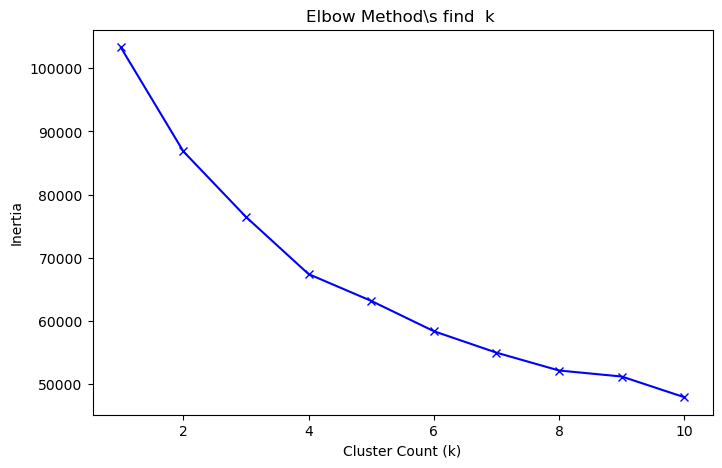

In [16]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
# 적절한 k 찾기 (Elbow Method)
inertia = []    # 각 k 값에 대한 군집 내 거리 제곱합(Inertia)을 저장할 리스트
K = range(1,11) # K 범위 (1 - 10) 클러스터(군집그룹) 개수

for k in K:
    kmeans = KMeans(n_clusters=k, random_state=42) # 클러스터 개수를 k로 지정
    kmeans.fit(train_df)  # 훈련 데이터로 학습 수행
    inertia.append(kmeans.inertia_) # 각 k에 대한 Inertia(거리 제곱합) 저장

# Elbow 그래프 시각화
plt.figure(figsize=(8,5))
plt.plot(K, inertia, 'bx-')
plt.xlabel('Cluster Count (k)')
plt.ylabel('Inertia')
plt.title('Elbow Method\s find  k ')
plt.show()

In [17]:
# 최적 k 선택 (예: 4)
kmeans = KMeans(n_clusters=4, random_state=42)
kmeans.fit(train_df)
train_df['cluster'] = kmeans.labels_

In [18]:
train_df

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE,cluster
2997,2.985723,0.505405,0.339235,-0.327692,1.402876,3.028419,1.256077,-0.408536,1.585600,0.970012,0.822627,5.042564,2.863577,0.113588,0.454535,-0.537727,0.355181,1
2237,-0.686572,0.067679,-0.286031,-0.359160,-0.016609,-0.468655,1.048393,-0.686280,1.376257,-0.681953,-0.479437,0.316405,-0.634620,-0.402731,-0.309402,-0.537727,0.355181,2
5990,-0.759868,-2.558680,-0.449507,-0.359160,-0.402842,-0.468655,-0.405401,-0.686280,-0.089149,-0.681953,-0.479437,-0.438192,-0.907916,-0.555813,-0.306996,0.137370,0.355181,0
4254,-0.758132,-3.434132,-0.427523,-0.300379,-0.458839,-0.468655,-1.028455,-0.408536,-0.926522,-0.681953,-0.479437,-0.557339,-0.825927,-0.580217,-0.358577,-0.537727,0.355181,0
8183,-0.741101,0.505405,-0.322806,-0.359160,-0.103494,-0.468655,1.256077,-0.686280,1.585600,-0.681953,-0.479437,-0.120467,-0.552631,-0.493809,-0.294213,0.868726,0.355181,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5734,0.047498,0.505405,-0.473208,-0.359160,-0.458839,-0.174274,-1.236139,-0.686280,-0.926522,1.795997,0.822627,-0.597054,-0.689279,-0.469433,-0.181087,-0.537727,0.355181,0
5191,-0.198646,0.505405,-0.473208,-0.359160,-0.458839,1.767537,-1.236139,-0.686280,-0.926522,1.795997,0.967300,-0.597054,-0.415982,0.196172,-0.251289,-0.537727,0.355181,1
5390,-0.754265,-0.182450,-0.429378,-0.359160,-0.355284,-0.468655,0.900046,-0.686280,0.867852,-0.681953,-0.479437,-0.358760,-0.962575,-0.583684,-0.320150,1.150015,-3.458970,2
860,2.089937,0.505405,-0.473208,-0.359160,-0.458839,5.191968,-1.236139,-0.686280,-0.926522,1.383007,3.860774,-0.597054,1.770390,2.733127,0.308793,-0.256438,0.355181,1


In [ ]:
#---------------------------------------------------------------------------
# 모델평가
#---------------------------------------------------------------------------

In [ ]:
from sklearn.metrics import silhouette_score

score = silhouette_score(train_df.drop('cluster', axis=1), train_df['cluster'])
print("Silhouette Score:", score)

# Silhouette Score는 각 데이터가 자기 클러스터에 잘 속했는지 평가하는 지표
# - 각 데이터 포인트가 **자신의 클러스터에 잘 속했는지**를 수치로 평가
# - 값의 범위: **-1 ~ 1**
# - 값이 1에 가까울수록 → 군집 간 경계가 명확  
# - 값이 0에 가까울수록 → 경계가 모호  
# - 값이 음수일 경우 → 잘못된 클러스터링 가능성 높음
### ● 점수 해석 기준
# | Silhouette Score | 해석 | 상태 |
# |------------------|------|------|
# | 0.7 ~ 1.0 | 매우 명확하게 구분된 군집 | 매우 우수 |
# | 0.5 ~ 0.7 | 꽤 잘 구분됨 | 양호 |
# | 0.25 ~ 0.5 | 다소 모호함 | 개선 필요 |
# | 0 ~ 0.25 | 거의 섞여 있음 | K값 재조정 필요 |
# | < 0 | 잘못된 군집화 | 비정상적인 모델 |

In [19]:
# -------------------------------------------
# 활용
# -------------------------------------------

In [20]:
# 0 : 일반 고객
# 1 : 우수 고객
# 2 : 최우수 고객
# 3 : VVIP

# 새로운 고객 데이터 예측 예시
new_data = [[1, 24, 40000, 3000, 150, 30, 1000, 8, 5, 2, 3, 1, 5000, 2, 120, 40, 10]]
new_scaled = scaler.transform(new_data)
pred_cluster = kmeans.predict(new_scaled)
print("신규 고객이 속한 클러스터:", pred_cluster[0])

신규 고객이 속한 클러스터: 3


/opt/conda/lib/python3.11/site-packages/sklearn/utils/validation.py:2749: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
/opt/conda/lib/python3.11/site-packages/sklearn/utils/validation.py:2749: UserWarning: X does not have valid feature names, but KMeans was fitted with feature names
  warnings.warn(
